In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact_manual, interact
from ipywidgets import Button, HBox, IntText, HTML, VBox
from IPython.display import display, clear_output

In [2]:
%load_ext autoreload
%autoreload 2

# Chargement des données 

On charge les propositions présidentielles.

In [6]:
from funcs import load_data

In [7]:
propositions, candidate_labels = load_data()

# Quizz candidats 

In [12]:
class GUI:
    def __init__(self, candidate_labels, propositions):
        # internal vars
        self.header = '<p style="font-size: 150%;font-weight: 300;line-height: 1.39;margin: 0 0 12.5px;">{} <a target="_blank" href="{}">source</a></p>'
        self.candidate_labels = candidate_labels
        self.propositions = propositions
        self.choice = None
        self.clicked = dict(zip(self.candidate_labels, [False] * len(self.candidate_labels)))
        self.confusion_matrix = np.zeros((len(candidate_labels), len(candidate_labels)))
        
        # candidate buttons
        buttons = [Button(description=label) for label in self.candidate_labels]
        for b in buttons:
            b.on_click(self.on_button_clicked)
        hbox1 = HBox()
        hbox1.children = buttons
        self.buttons = buttons

        # scorebox and new_question button and confusion matrix
        self.scorebox = IntText(description='score', value=0)
        new_question = Button(description='nouvelle question !')
        new_question.on_click(self.create_new_question)
        confusion_matrix_button = Button(description='afficher matrice de confusion')
        confusion_matrix_button.on_click(self.show_confusion_matrix)
        hbox2 = HBox()
        hbox2.children = [self.scorebox, new_question, confusion_matrix_button]

        # proposition box
        self.html = HTML()

        # general layout
        vbox = VBox()
        vbox.children = [hbox1, hbox2, self.html]
        self.box = vbox

        # generate first question
        self.create_new_question()
        
    def create_new_question(self, b=None):
        clear_output()
        choice = np.random.randint(len(self.candidate_labels))
        self.choice = choice
        current_propositions = self.propositions[choice]
        n = current_propositions.shape[0]
        m = np.random.randint(n)
        self.html.value = self.header.format(current_propositions['proposition'][m],
                                             current_propositions['source'][m])
        for b in self.buttons:
            b.style.button_color = None
            self.clicked = dict(zip(self.candidate_labels, [False] * len(self.candidate_labels)))
        
    def on_button_clicked(self, b):
        clear_output()
        if not self.clicked[b.description]:
            if b.description == self.candidate_labels[self.choice]:
                self.scorebox.value += 1
                b.style.button_color = 'lightgreen'
                self.update_confusion_matrix(b.description, self.candidate_labels[self.choice])
            else:
                self.scorebox.value -= 1
                b.style.button_color = 'red'
                self.update_confusion_matrix(b.description, self.candidate_labels[self.choice])
        self.clicked[b.description] = True
        
    def update_confusion_matrix(self, clicked_label, true_label):
        "Updates confusion matrix with answer."
        clicked = self.candidate_labels.index(clicked_label)
        true = self.candidate_labels.index(true_label)
        self.confusion_matrix[true, clicked] += 1
        
    def show_confusion_matrix(self, b):
        classes = self.candidate_labels
        plt.imshow(self.confusion_matrix)
        plt.colorbar(label='nombre de réponses')
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
        plt.ylabel('Vraie réponse')
        plt.xlabel('Ce que vous avez répondu')
        print(self.confusion_matrix)

In [14]:
%matplotlib inline

[[ 3.  0.  1.  1.  1.  1.]
 [ 2.  3.  0.  0.  1.  1.]
 [ 3.  0.  7.  3.  3.  2.]
 [ 1.  0.  0.  2.  0.  0.]
 [ 3.  1.  1.  2.  5.  0.]
 [ 0.  0.  0.  0.  0.  2.]]


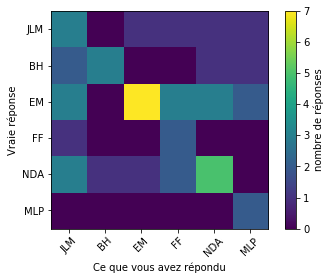

In [13]:
%
gui = GUI(candidate_labels, propositions)
display(gui.box)

# Recherche plein texte de propositions 

In [7]:
def make_df(candidate, candidate_label):
    "Returns a dataframe with candidate name."
    ind_s = pd.Series(index=candidate.index, data=[candidate_label], name='candidat')
    return pd.DataFrame(data=[ind_s, candidate]).transpose()

In [8]:
all_propositions = pd.concat([make_df(c, label) for c, label in zip(candidates, candidate_labels)])

NameError: name 'candidates' is not defined

In [ ]:
ind = all_propositions['proposition'].str.lower().str.contains('vert')

In [ ]:
all_propositions[ind]

In [ ]:
mask = all_propositions[ind]

In [ ]:
mask.groupby(by='candidat').sum().iloc[0].values

In [ ]:
from ipywidgets import interact, IntSlider, SelectMultiple

In [ ]:
mask.size

In [ ]:
slider = IntSlider(min=0, max=mask.size - 1)
slider

In [ ]:
selector = SelectMultiple(
        options=mask['proposition'].values.tolist(),
        value=[],
        description='',
        disabled=False,
        )
selector.layout.width='500px'
selector.layout.height = "300px"

In [ ]:
@interact
def search_for_props(search='croissance'):
    ind = all_propositions['proposition'].str.lower().str.contains(search)
    mask = all_propositions[ind]
    selector.options = mask['proposition'].values.tolist()

display(selector)